In [58]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
data=pd.read_csv('/content/drive/MyDrive/implementation.csv')

In [60]:
data.head(5)

,ID,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,GROUP
0,./Caltech/0051456/session_1/anat_1/abide_cc,646.25,208.77,0.186321,72.5,13.00,139.75,88.75,84.25,58.5,50.50,211.50,1
1,./Caltech/0051457/session_1/anat_1/abide_cc,638.50,216.94,0.170480,79.5,26.50,161.75,94.25,70.00,54.0,56.75,175.25,1
2,./Caltech/0051458/session_1/anat_1/abide_cc,610.75,205.70,0.181383,75.5,8.50,118.75,103.25,68.75,63.5,57.00,191.00,1
3,./Caltech/0051459/session_1/anat_1/abide_cc,649.00,213.80,0.178414,78.5,30.25,151.25,99.25,64.25,44.5,55.25,204.25,1
4,./Caltech/0051460/session_1/anat_1/abide_cc,633.75,203.80,0.191738,68.5,36.00,135.75,85.75,72.00,63.5,50.75,190.00,1


In [61]:
data.drop('ID',axis=1,inplace=True)

In [10]:
data.head(5)

,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,GROUP
0,646.25,208.77,0.186321,72.5,13.00,139.75,88.75,84.25,58.5,50.50,211.50,1
1,638.50,216.94,0.170480,79.5,26.50,161.75,94.25,70.00,54.0,56.75,175.25,1
2,610.75,205.70,0.181383,75.5,8.50,118.75,103.25,68.75,63.5,57.00,191.00,1
3,649.00,213.80,0.178414,78.5,30.25,151.25,99.25,64.25,44.5,55.25,204.25,1
4,633.75,203.80,0.191738,68.5,36.00,135.75,85.75,72.00,63.5,50.75,190.00,1


In [62]:
data.isnull().values.any()

False

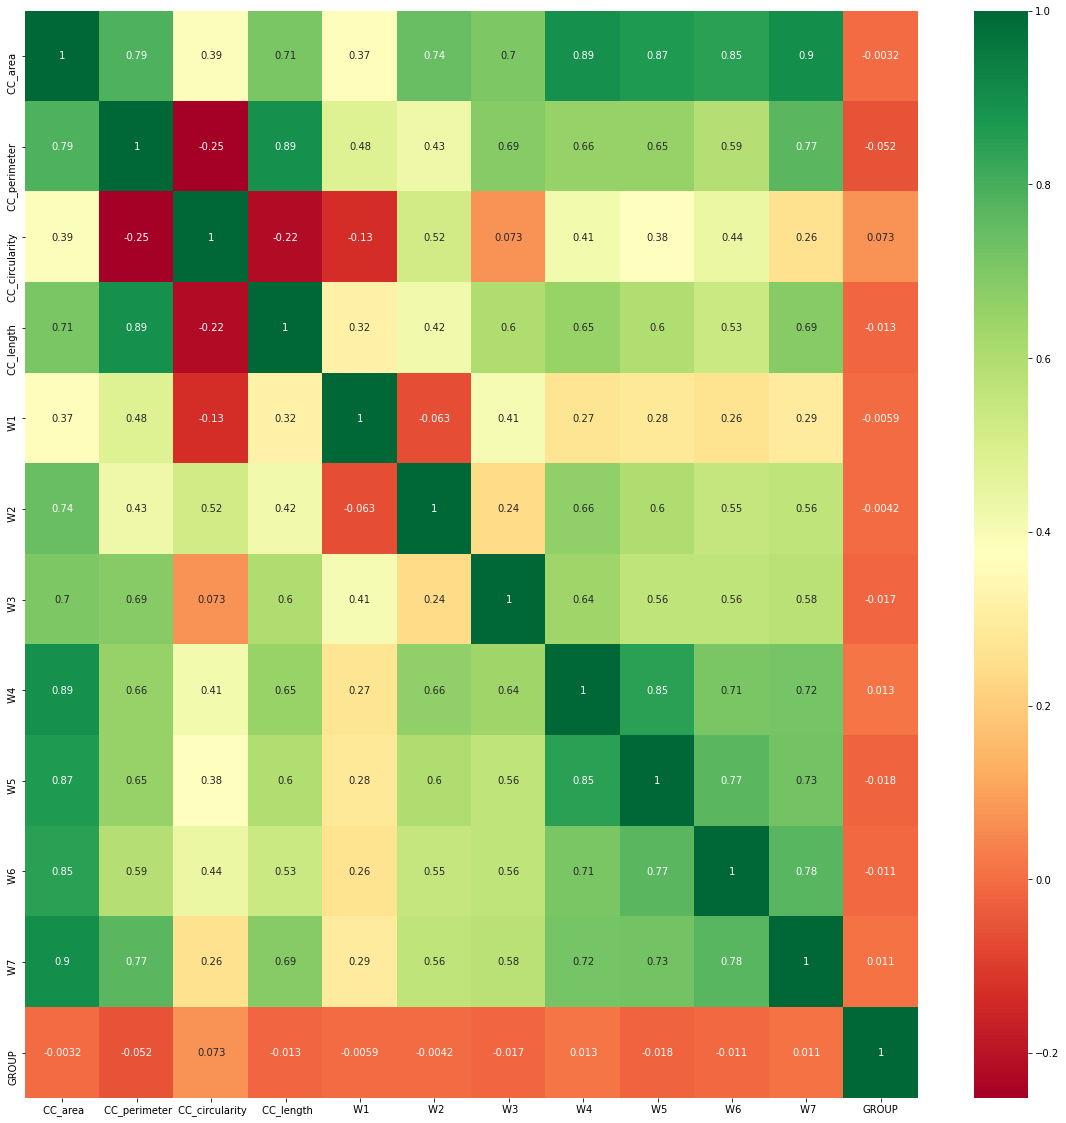

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [64]:
data.corr()

,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,GROUP
CC_area,1.000000,0.787921,0.388335,0.710320,0.365278,0.741684,0.702518,0.891100,0.866237,0.848235,0.897618,-0.003219
CC_perimeter,0.787921,1.000000,-0.251789,0.888800,0.476855,0.429769,0.685492,0.656166,0.654255,0.588087,0.769404,-0.051854
CC_circularity,0.388335,-0.251789,1.000000,-0.220006,-0.133320,0.516957,0.073205,0.413815,0.376962,0.439766,0.261083,0.073404
CC_length,0.710320,0.888800,-0.220006,1.000000,0.316229,0.422234,0.599240,0.651035,0.596483,0.534730,0.685390,-0.012705
W1,0.365278,0.476855,-0.133320,0.316229,1.000000,-0.063093,0.407287,0.268123,0.281587,0.264042,0.291421,-0.005864
W2,0.741684,0.429769,0.516957,0.422234,-0.063093,1.000000,0.239147,0.663068,0.602302,0.550079,0.560776,-0.004160
W3,0.702518,0.685492,0.073205,0.599240,0.407287,0.239147,1.000000,0.636977,0.560931,0.561325,0.577656,-0.016690
W4,0.891100,0.656166,0.413815,0.651035,0.268123,0.663068,0.636977,1.000000,0.845498,0.710337,0.720484,0.012900
W5,0.866237,0.654255,0.376962,0.596483,0.281587,0.602302,0.560931,0.845498,1.000000,0.768382,0.725323,-0.018137
W6,0.848235,0.588087,0.439766,0.534730,0.264042,0.550079,0.561325,0.710337,0.768382,1.000000,0.775038,-0.010836


In [65]:
autism_true_count=len(data.loc[data['GROUP']==1])
autism_false_count=len(data.loc[data['GROUP']==2])


In [66]:
(autism_true_count,autism_false_count)

(530, 570)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [69]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [70]:
new_input = [[646.25,208.77,	0.186321,	72.5,	13,	139.75,	88.75,	84.25,	58.5,	50.5,211.5]]

new_output = random_forest_model.predict(new_input)

In [71]:
print(new_input,new_output)

[[646.25, 208.77, 0.186321, 72.5, 13, 139.75, 88.75, 84.25, 58.5, 50.5, 211.5]] [1]


In [29]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.542


In [30]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [31]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [32]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [34]:
random_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   p

In [35]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [36]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1
       subsample=1)

In [40]:
xgboost_classifier=classifier.fit(X_train,y_train)

In [41]:
predict_train_data = xgboost_classifier.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.482


In [43]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [78]:
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
 
 

def prepare_inputs(X_train, X_test):
	
	X_train_enc = X_train
	X_test_enc = X_test
	return X_train_enc, X_test_enc
 

def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# define the  model
model = Sequential()
model.add(Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='softmax'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=100, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
47/47 - 0s - loss: 23.2036 - accuracy: 0.5414
Epoch 2/100
47/47 - 0s - loss: 3.3589 - accuracy: 0.5414
Epoch 3/100
47/47 - 0s - loss: 3.0119 - accuracy: 0.5414
Epoch 4/100
47/47 - 0s - loss: 2.8219 - accuracy: 0.5414
Epoch 5/100
47/47 - 0s - loss: 2.6310 - accuracy: 0.5414
Epoch 6/100
47/47 - 0s - loss: 2.5434 - accuracy: 0.5414
Epoch 7/100
47/47 - 0s - loss: 2.3941 - accuracy: 0.5414
Epoch 8/100
47/47 - 0s - loss: 2.1231 - accuracy: 0.5414
Epoch 9/100
47/47 - 0s - loss: 2.0414 - accuracy: 0.5414
Epoch 10/100
47/47 - 0s - loss: 1.8798 - accuracy: 0.5414
Epoch 11/100
47/47 - 0s - loss: 1.8343 - accuracy: 0.5414
Epoch 12/100
47/47 - 0s - loss: 1.6347 - accuracy: 0.5414
Epoch 13/100
47/47 - 0s - loss: 1.6572 - accuracy: 0.5414
Epoch 14/100
47/47 - 0s - loss: 1.5979 - accuracy: 0.5414
Epoch 15/100
47/47 - 0s - loss: 1.4736 - accuracy: 0.5414
Epoch 16/100
47/47 - 0s - loss: 1.4443 - accuracy: 0.5414
Epoch 17/100
47/47 - 0s - loss: 1.3413 - accuracy: 0.5414
Epoch 18/100
47/47 - 0

In [79]:
new_input = [[646.25,208.77,	0.186321,	72.5,	13,	139.75,	88.75,	84.25,	58.5,	50.5,211.5]]

new_output = model.predict(new_input)

In [80]:
print(new_input,new_output)

[[646.25, 208.77, 0.186321, 72.5, 13, 139.75, 88.75, 84.25, 58.5, 50.5, 211.5]] [[1.]]
